## Cho dữ liệu petrol_consumption.csv
## Hãy áp dụng Linear Regression để dự đoán Petrol_Consumption dựa trên Petrol_tax, Average_income, Paved_Highways, Population_Driver_licence(%)
1. Đọc dữ liệu. Xem thông tin data về dữ liệu. Chuẩn hóa dữ liệu nếu cần.
2. Vẽ viểu đồ quan sát mối liên hệ giữa các biến Petrol_Consumption, Petrol_tax,
Average_income, Paved_Highways, Population_Driver_licence(%)
3. Tạo inputs data và outputs data => Tạo X_train, X_test, y_train, y_test với tỷ lệ 80:20
4. Thực hiện Linenear Regression với X_train, y_train
5. Dự đoán y từ X_test => so sánh với y_test
6. Tính Coefficients, Intercept và Variance score, MSE
7. Vẽ hình và xem kết quả
8. Nhận xét dựa trên kết quả, có giải pháp nào để kết quả tốt hơn không?

## X: 'Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)'
## Y: 'Petrol_Consumption'

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
np.set_printoptions(suppress=True) #To suppress scientific notation: 1e+01 => 10

## <span style='color:yellow'> 1. Đọc dữ liệu. Xem thông tin data về dữ liệu. Chuẩn hóa dữ liệu nếu cần.
##  <span style='color:yellow'> 2. Vẽ viểu đồ quan sát mối liên hệ giữa các biến Petrol_Consumption, Petrol_tax, Average_income, Paved_Highways, Population_Driver_licence(%)

In [25]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)

petrol = pd.read_csv('Data/petrol_consumption.csv')
print(petrol.head())
print()
print(petrol.shape)

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  Petrol_Consumption
0         9.0            3571            1976                         0.525                 541
1         9.0            4092            1250                         0.572                 524
2         9.0            3865            1586                         0.580                 561
3         7.5            4870            2351                         0.529                 414
4         8.0            4399             431                         0.544                 410

(48, 5)


In [27]:
petrol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [29]:
petrol.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

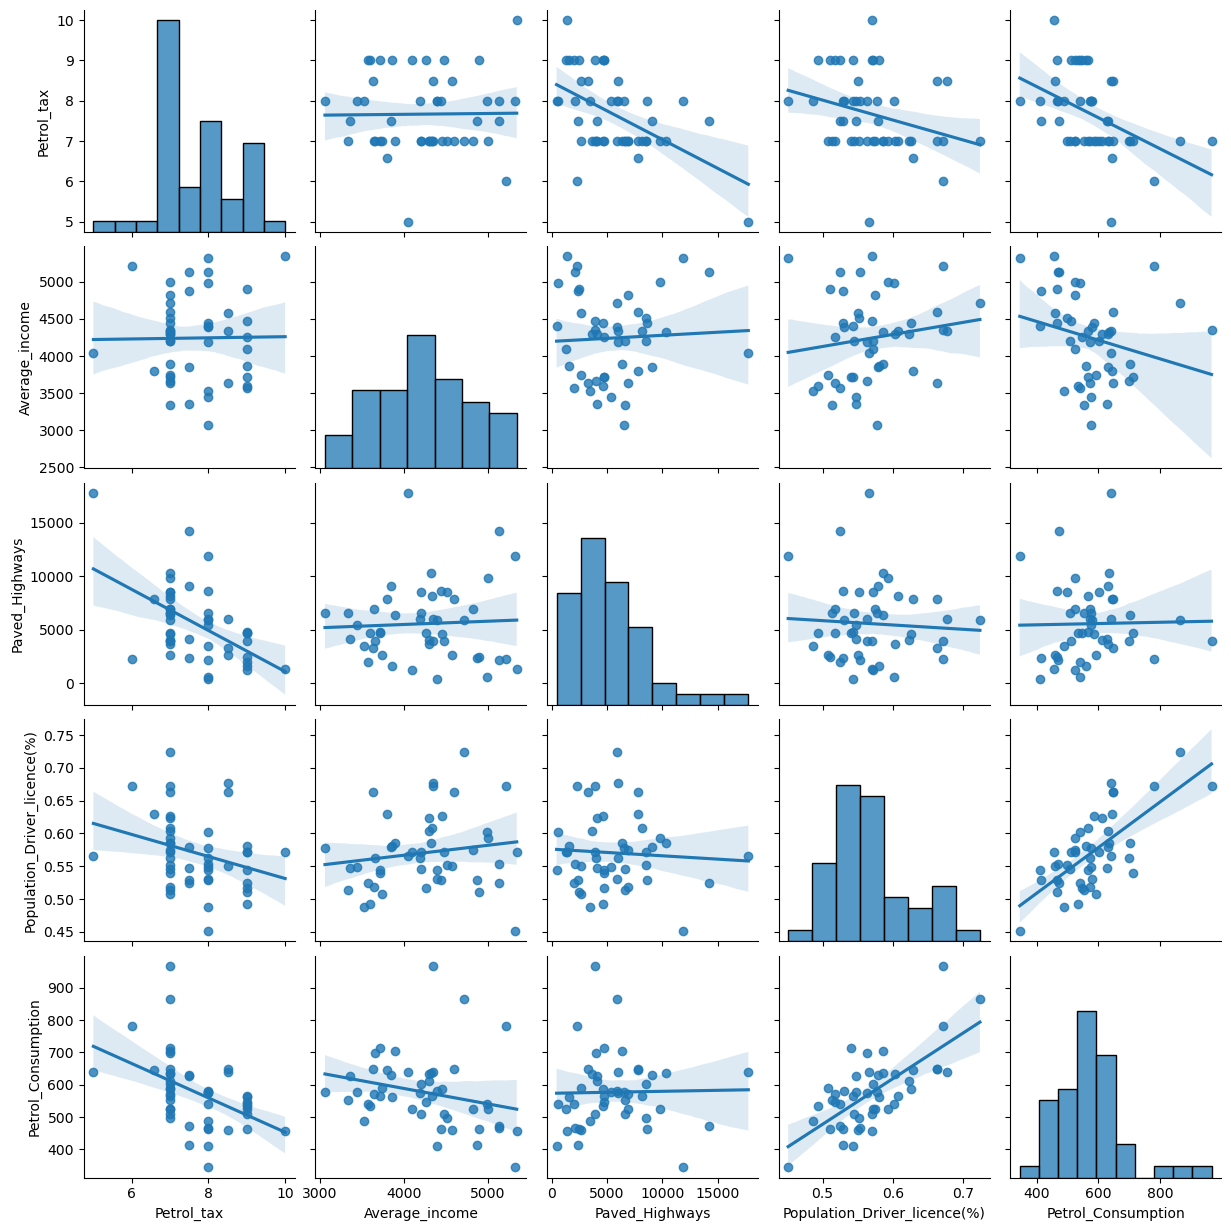

In [35]:
sbn.pairplot(petrol, kind='reg')
plt.show()

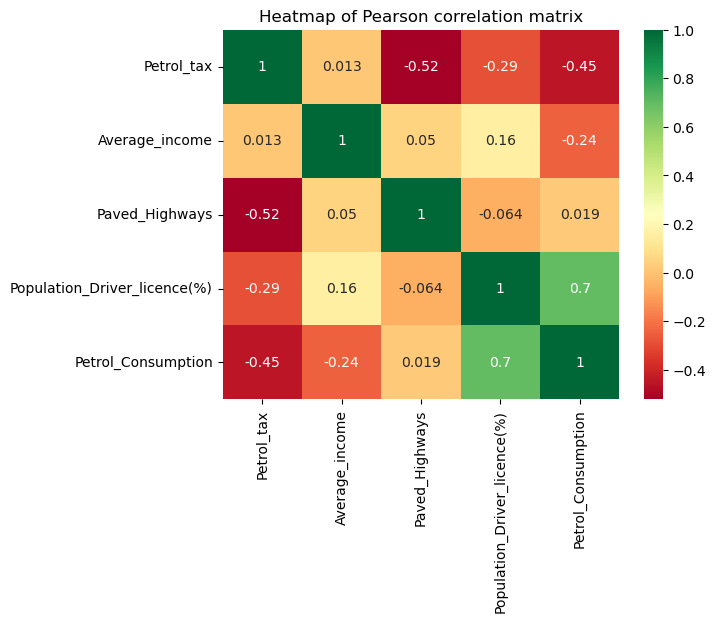

In [44]:
sbn.heatmap(petrol.corr(), cmap='RdYlGn', annot=True)
plt.title('Heatmap of Pearson correlation matrix')
plt.show()

## <span style='color:yellow'> 4. Tạo inputs data và outputs data => Tạo X_train, X_test, y_train, y_test với tỷ lệ 80:20
## <span style='color:yellow'> 5. Thực hiện Linenear Regression với X_train, y_train
## <span style='color:yellow'> 6. Dự đoán y từ X_test => so sánh với y_test
## <span style='color:yellow'> 7. Tính Coefficients, Intercept và Variance score (R^2 score), MSE
## <span style='color:yellow'> 8. Vẽ hình và xem kết quả

In [53]:
x = petrol[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = petrol['Petrol_Consumption']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

    Y_test_true  Y_test_predict
33          628      621.250921
23          547      463.618291
38          648      727.431022
36          640      646.094665
2           561      585.209891
3           414      486.869741
31          554      587.673738
26          577      597.031210
44          782      702.923921
27          631      617.312283

Coefficients: [ -32.00395375   -0.0751879    -0.0021373  1355.82760585]
Intercept: 380.8564540023472

Variance score (or R^2 score) on train set: 0.6751909554104613
Variance score (or R^2 score) on test set: 0.6611179509319682

MSE on test set: 2721.615957193215



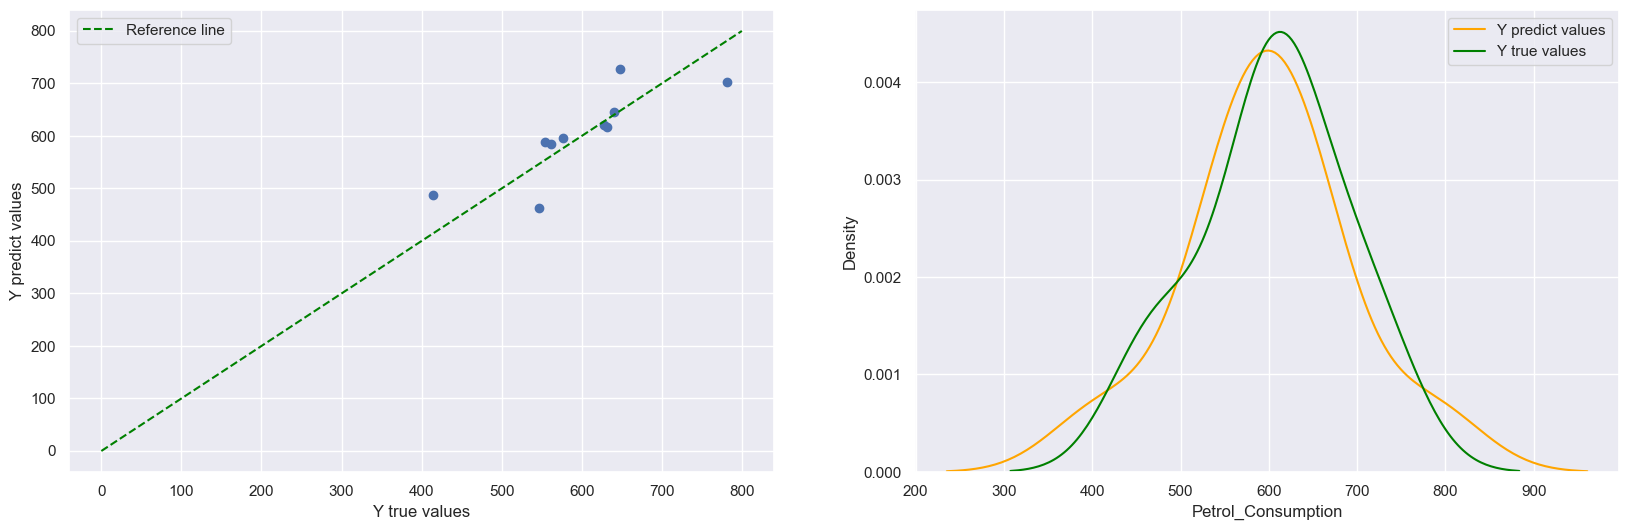

In [77]:
linreg = LinearRegression().fit(x_train, y_train)

y_test_pred = linreg.predict(x_test)

print(pd.DataFrame({'Y_test_true':y_test, 'Y_test_predict':y_test_pred}))
print()

print(f'Coefficients: {linreg.coef_}')
print(f'Intercept: {linreg.intercept_}')
print()

print(f'Variance score (or R^2 score) on train set: {linreg.score(x_train, y_train)}')
print(f'Variance score (or R^2 score) on test set: {r2_score(y_test, y_test_pred)}')
print()
print(f'MSE on test set: {mean_squared_error(y_test, y_test_pred)}')
print()

sbn.set_theme(style='darkgrid')

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(y_test, y_test_pred)
plt.plot([0,800], [0,800], '--', color='green', label='Reference line')
plt.xlabel('Y true values')
plt.ylabel('Y predict values')
plt.legend()

plt.subplot(1,2,2)
sbn.kdeplot(y_test, color='orange', label='Y predict values')
sbn.kdeplot(y_test_pred, color='green', label='Y true values')
plt.legend()
plt.show()

Ta có thể thấy rằng mô hình chỉ khái quát được ~67% dữ liệu, MSE lớn => Điều này có nghĩa là thuật toán không chính xác lắm (nhưng vẫn có thể đưa ra những dự đoán hợp lý) 

Một số yếu tố có thể đã góp phần vào sự không chính xác này, đó là:
+ Cần thêm dữ liệu: Chỉ có một năm giá trị của dữ liệu nên chưa đủ lớn
+ Giả định xấu: khi đưa giả thiết rằng dữ liệu này có mối quan hệ tuyến tính => nhưng điều đó có thể không đúng. (Trực quan hóa dữ liệu có thể giúp ta xác định điều này)
+ Tính năng kém: Các tính năng sử dụng có thể không có tương quan đủ cao với các giá trị ta đang cố gắng dự đoán.

## <span style='color:yellow'> 9.Có giải pháp nào để kết quả tốt hơn không? => Polynomial

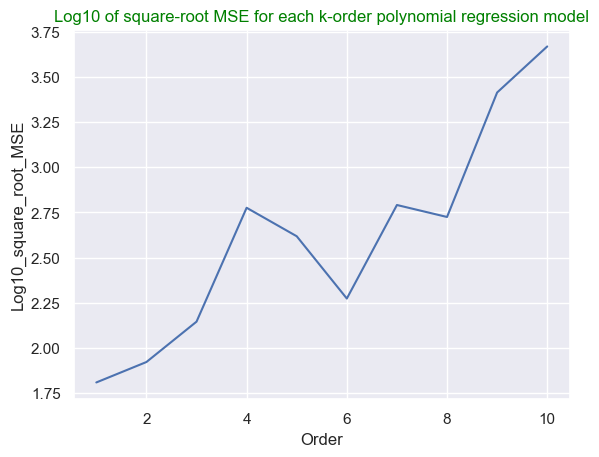

In [129]:
from sklearn.preprocessing import PolynomialFeatures
import math

lst_rmse = []

for k in range(1, 11, 1):
    x_pf = PolynomialFeatures(degree=k).fit_transform(x)
    x_train_pf, x_test_pf, y_train_pf, y_test_pf = train_test_split(x_pf, y, test_size=0.2, random_state=2)

    lr_model = LinearRegression().fit(x_train_pf, y_train_pf)
    y_test_pred_pf = lr_model.predict(x_test_pf)
    
    rmse = math.sqrt(mean_squared_error(y_test_pf, y_test_pred_pf))
    lst_rmse.append(rmse)

orders = [i for i in range(1, 11, 1)]

sbn.lineplot(x = orders, y = list(map(math.log10, lst_rmse)))
plt.xlabel('Order')
plt.ylabel('Log10_square_root_MSE')
plt.title('Log10 of square-root MSE for each k-order polynomial regression model', color='green')
plt.show()

# If use polynomial regression with order = 2, the log10_sqrt_MSE will increase => MSE increases => not good